In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
import os
import pandas as pd
from scipy.io import arff

# Path to the folder containing the ARFF files
folder_path = './multiclass'

# Initialize an empty list to hold the DataFrames
data_frames = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.arff'):
        # Full path to the ARFF file
        file_path = os.path.join(folder_path, file_name)
        
        # Load the ARFF file
        data, meta = arff.loadarff(file_path)
        
        # Convert the ARFF data to a pandas DataFrame
        df = pd.DataFrame(data)
        
        # Decode byte columns to string if necessary
        df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
        
        # Append the DataFrame to the list
        data_frames.append(df)

# Merge all DataFrames into one
merged_df = pd.concat(data_frames, ignore_index=True)

# Display the merged DataFrame


In [3]:
dfn=merged_df[merged_df['marker']=='41']

In [4]:
dfn.shape

(4405, 129)

In [4]:
dfn=dfn.drop(columns=['marker'],axis=1)

In [5]:
for col in dfn.select_dtypes(include=['object']).columns:
    dfn[col] = pd.to_numeric(dfn[col], errors='coerce')

In [8]:
for col in dfn.columns :
    print (f"{col} : {dfn[col].dtype}")

R1-PA1:VH : float64
R1-PM1:V : float64
R1-PA2:VH : float64
R1-PM2:V : float64
R1-PA3:VH : float64
R1-PM3:V : float64
R1-PA4:IH : float64
R1-PM4:I : float64
R1-PA5:IH : float64
R1-PM5:I : float64
R1-PA6:IH : float64
R1-PM6:I : float64
R1-PA7:VH : float64
R1-PM7:V : float64
R1-PA8:VH : float64
R1-PM8:V : float64
R1-PA9:VH : float64
R1-PM9:V : float64
R1-PA10:IH : float64
R1-PM10:I : float64
R1-PA11:IH : float64
R1-PM11:I : float64
R1-PA12:IH : float64
R1-PM12:I : float64
R1:F : float64
R1:DF : float64
R1-PA:Z : float64
R1-PA:ZH : float64
R1:S : float64
R2-PA1:VH : float64
R2-PM1:V : float64
R2-PA2:VH : float64
R2-PM2:V : float64
R2-PA3:VH : float64
R2-PM3:V : float64
R2-PA4:IH : float64
R2-PM4:I : float64
R2-PA5:IH : float64
R2-PM5:I : float64
R2-PA6:IH : float64
R2-PM6:I : float64
R2-PA7:VH : float64
R2-PM7:V : float64
R2-PA8:VH : float64
R2-PM8:V : float64
R2-PA9:VH : float64
R2-PM9:V : float64
R2-PA10:IH : float64
R2-PM10:I : float64
R2-PA11:IH : float64
R2-PM11:I : float64
R2-PA12:IH

In [9]:
dfn.shape

(4405, 128)

In [16]:
dfn['R1-PM2:V'].max()

137551.9592

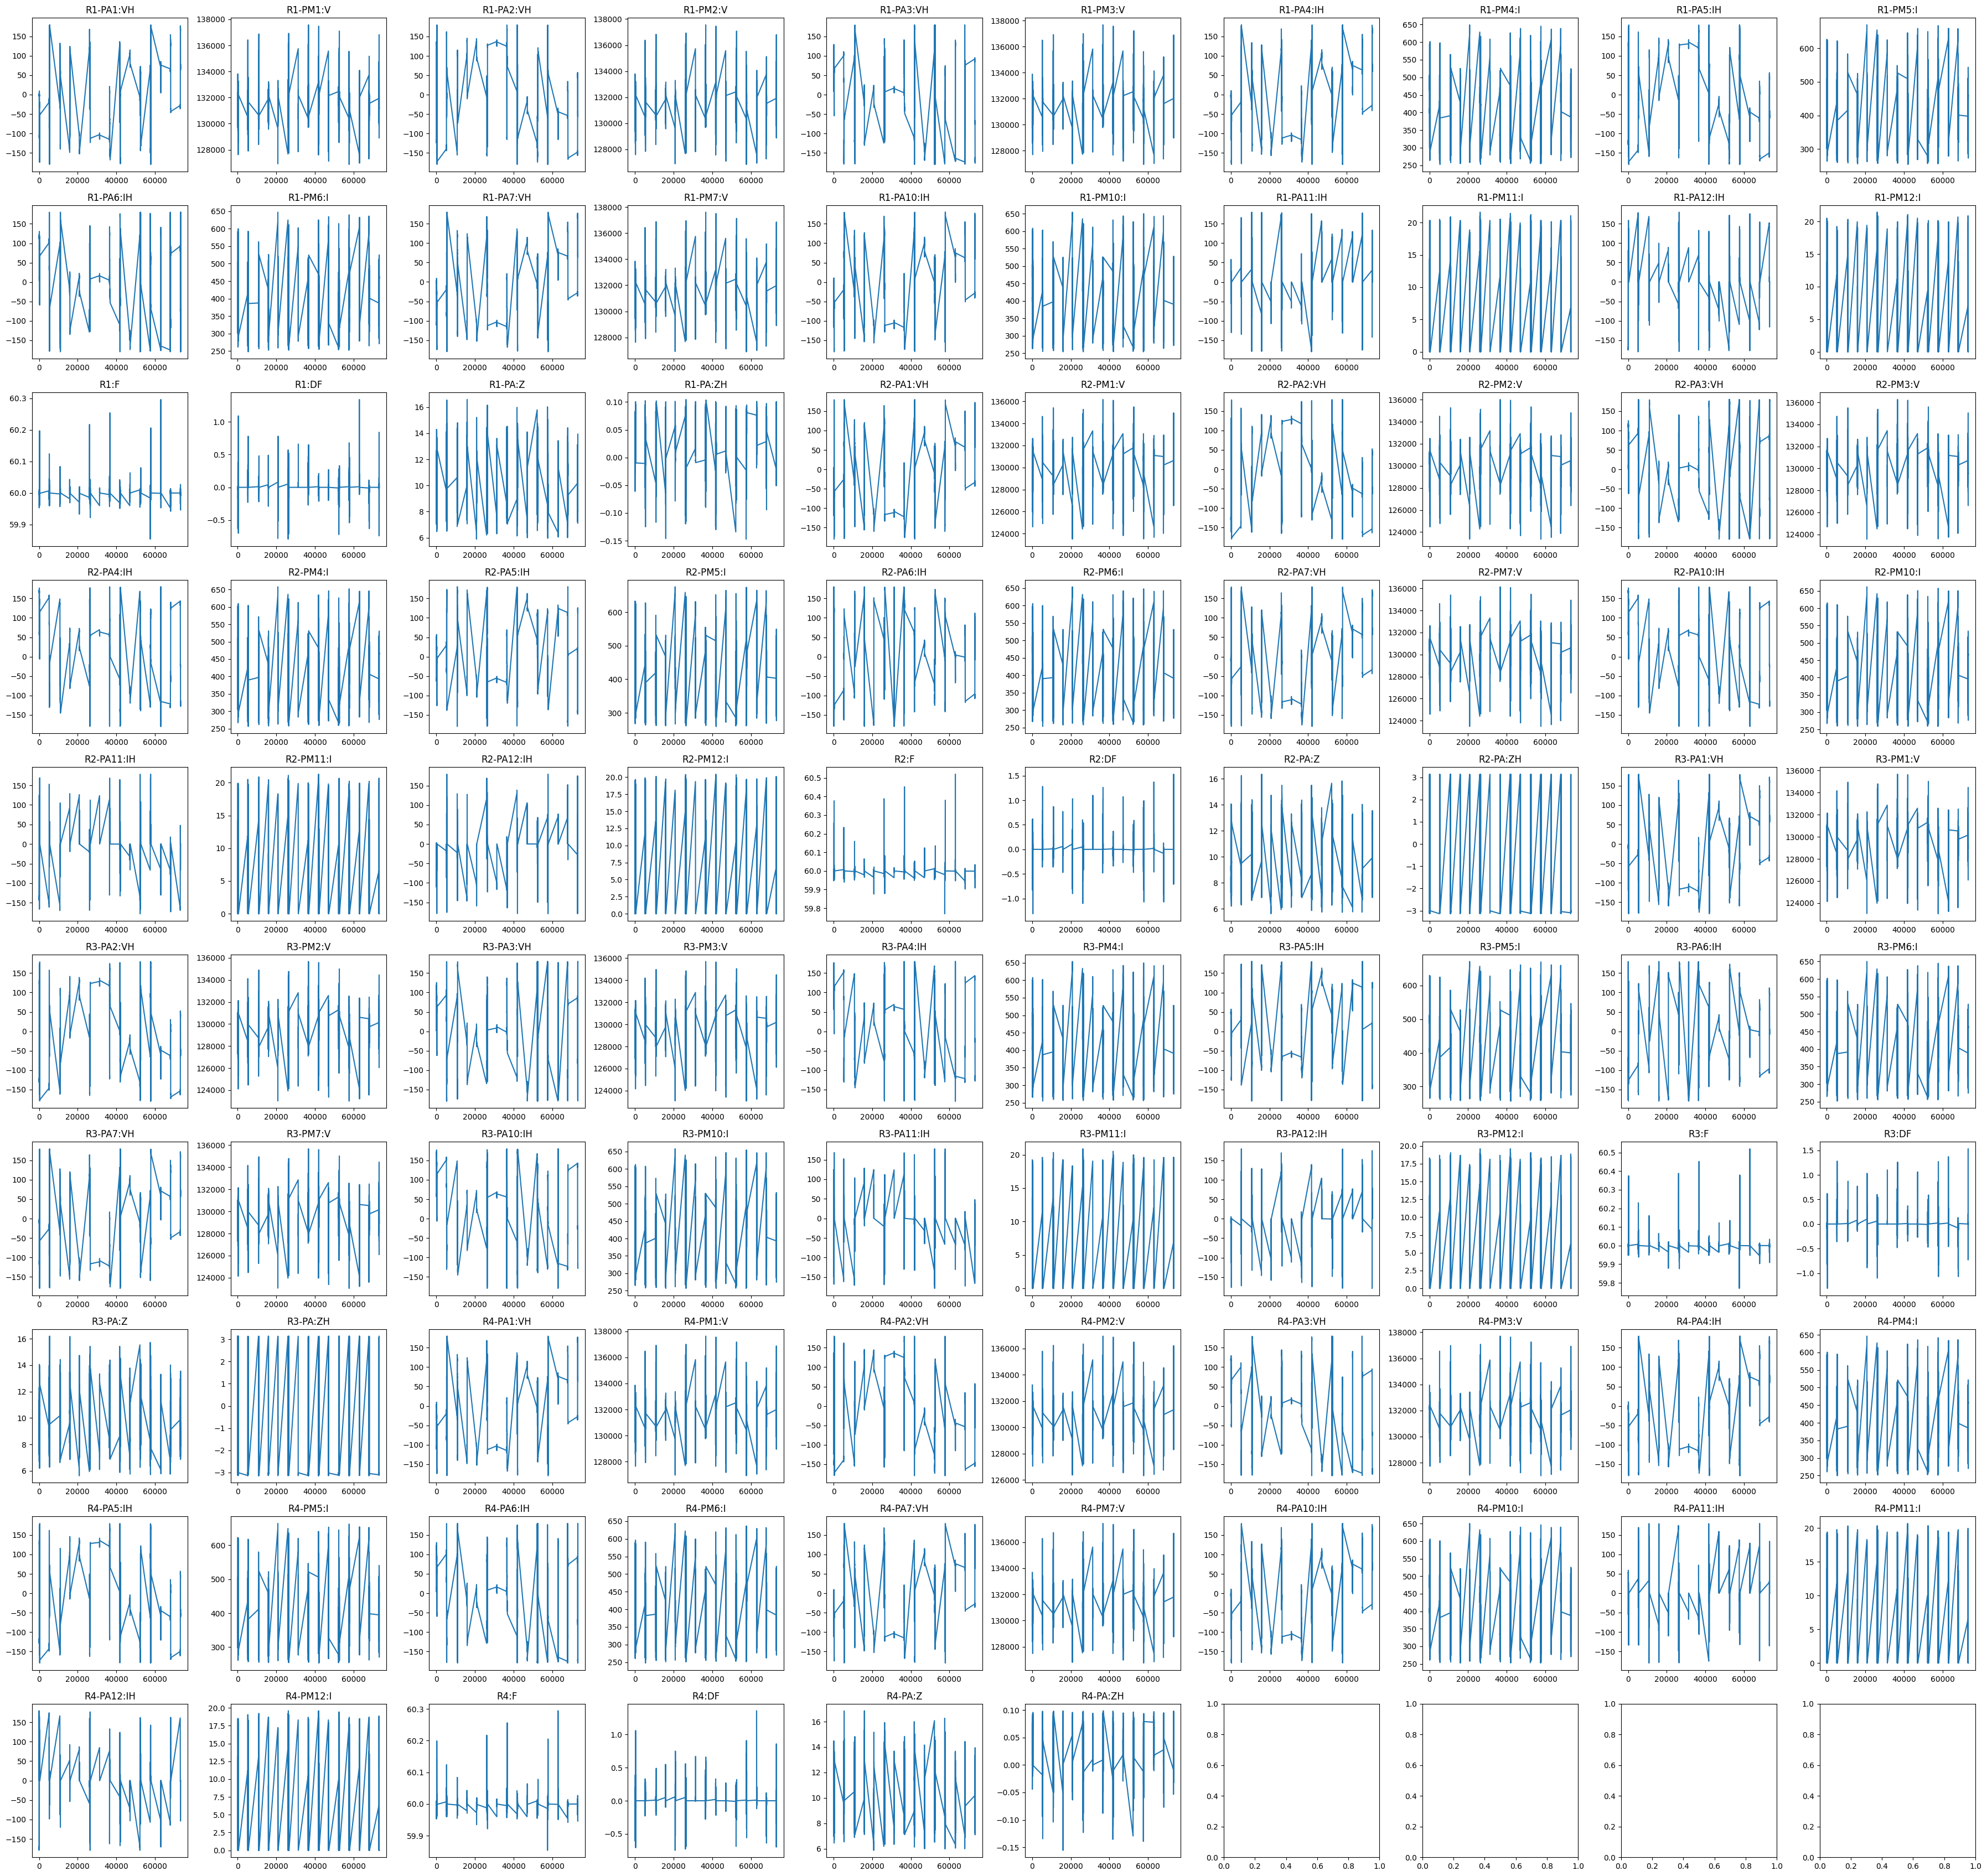

In [12]:
# Plot each column
import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(36, 34))  # Adjust grid size
axes = axes.flatten()

for i, col in enumerate(dfn.columns[:]):
    dfn[col].plot(ax=axes[i], title=col)

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
dfn=pd.read_csv("data-normal.csv")
dfn=dfn.drop(columns=['Unnamed: 0'],axis=1)

In [4]:
dfn=dfn.drop(columns=['Unnamed: 0'],axis=1)

In [9]:

for col in ['PA7','PA8','PA9','PM7','PM8','PM9','PA10','PA11','PA12','PM10','PM11','PM12']:
    dfn = dfn.loc[:, ~dfn.columns.str.contains(col)]

In [11]:


# Find columns where all rows are 0
dfn = dfn.loc[:, ~dfn.columns.str.contains("log")]
all_zero_columns = dfn.columns[(dfn == 0).all()]
dfn=dfn.drop(all_zero_columns,axis=1)


In [12]:
dfn.shape

(4405, 64)

In [23]:
dfn.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH
count,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000
mean,-4.190609,131592.358852,-9.583470,131559.760756,-11.575956,131657.384285,-4.064379,390.543992,-9.374341,393.023106,-7.210512,390.265648,59.999707,0.001501,10.131280,0.033525,-3.477437,130283.626451,-6.631267,130136.412872,-0.331289,130364.787081,12.507423,395.512128,15.872574,397.925139,2.081256,395.656346,59.999943,0.001655,9.895109,-2.837836,-3.476985,129814.968532,-6.571486,129788.944696,-0.542451,129836.996580,12.626236,393.027096,15.877695,394.749453,2.172051,392.314318,59.999944,0.001691,9.897172,-2.861191,-4.127449,131641.440988,-9.618146,131006.162306,-11.680031,131699.675863,-3.961973,387.925082,-9.358231,390.022804,-7.811081,387.336262,59.999722,0.001707,10.182521,0.033774
std,100.494805,796.086302,104.142972,795.095132,106.135857,796.180841,100.457670,81.303075,104.161900,82.791406,106.850787,81.164539,0.011023,0.067999,2.222401,0.039555,100.691135,1228.943685,104.684401,1227.444112,107.231999,1229.251270,105.153427,81.800067,101.895889,83.308210,103.131555,81.730747,0.017949,0.097375,2.191728,1.107392,100.691012,1223.261036,104.689942,1223.273086,107.230578,1224.029266,105.139032,81.474348,101.895259,82.834847,103.129985,81.364052,0.017927,0.097949,2.193984,1.039646,100.494518,798.211741,104.135043,793.760591,106.117534,797.486126,100.454289,81.029006,104.158521,82.375985,106.812413,80.738595,0.011009,0.069054,2.244552,0.038972
min,-179.920207,126870.746200,-179.725401,126845.672900,-179.868641,126945.966000,-179.920207,252.325580,-179.954584,254.156680,-179.925936,248.114050,59.854000,-0.790000,5.889397,-0.147158,-179.958805,123497.203100,-179.997259,123362.429700,-179.931334,123569.437500,-179.997259,256.410583,-179.920351,259.426117,-179.958805,253.572464,59.770000,-1.310000,5.629625,-3.141020,-179.966044,123034.535900,-179.960314,123009.462600,-179.988962,123059.609200,-179.988962,254.706010,-179.868641,257.086440,-179.988962,251.593140,59.770000,-1.310000,5.626417,-3.141578,-179.857182,126920.892700,-179.994691,126319.134300,-179.994691,126996.112600,-179.931666,249.578930,-179.920207,253.058020,-179.988962,247.747830,59.854000,-0.750000,5.863813,-0.155597
25%,-100.777547,131108.128800,-110.672528,131083.055600,-113.399807,131183.348600,-98.457068,319.526950,-110.810038,320.625610,-110.185514,319.526950,59.999000,0.000000,8.265491,0.005424,-92.145085,129441.968800,-108.987122,129296.226600,-104.658511,129522.523400,-76.269840,323.930725,-73.089294,324.565888,-86.706847,324.165344,59.999001,0.000000,8.026568,-3.060901,-92.131613,128976.900900,-108.993761,128951.827600,-105.682065,129001.974200,-76.254953,321.541160,-73.052119,321.907380,-86.722892,321.174940,59.999000,0.000000,8.026405,-3.

dfn['R1-PM1:V].plot()

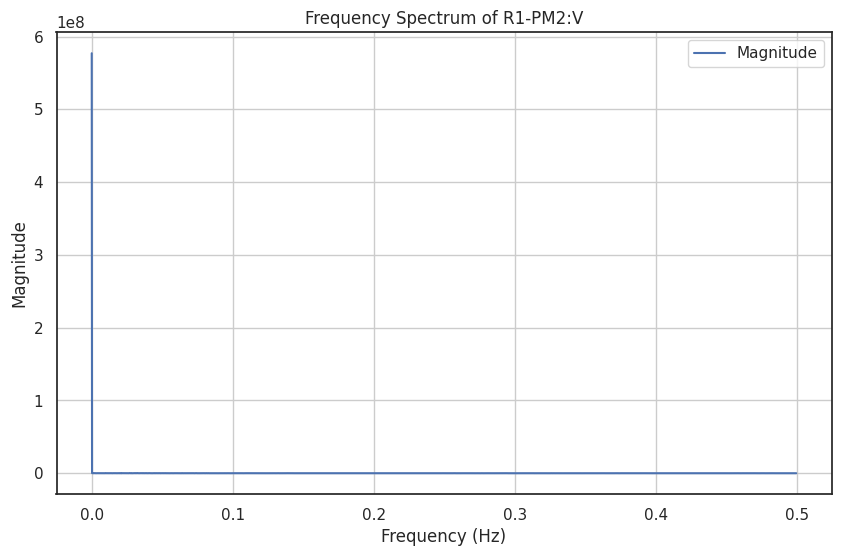

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the signal from the DataFrame
signal = dfn['R4-PM2:V'].dropna().values  # Remove NaN values if any

# Number of samples
N = len(signal)

# Sampling frequency (you need to provide this if known, e.g., fs = 1.0 for 1 Hz)
# For now, I'll assume a normalized sampling rate of 1 unit
fs = 1.0  # Replace with your actual sampling frequency (samples per second)

# Compute the FFT
fft_vals = np.fft.fft(signal)

# Compute the corresponding frequencies
freqs = np.fft.fftfreq(N, d=1/fs)  # d = time step = 1/sampling frequency

# Magnitude of FFT (absolute value, typically what people mean by "frequency elements")
fft_magnitude = np.abs(fft_vals)
# Take only the first half of the FFT (positive frequencies)
half_N = N // 2
fft_magnitude = fft_magnitude[:half_N]
freqs = freqs[:half_N]
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs, fft_magnitude, 'b-', label='Magnitude')
plt.title('Frequency Spectrum of R1-PM2:V')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
# Pair frequencies with magnitudes
freq_magnitude_pairs = list(zip(freqs, fft_magnitude))

# Sort by magnitude (descending) to find dominant frequencies
sorted_pairs = sorted(freq_magnitude_pairs, key=lambda x: x[1], reverse=True)

# Print top 5 frequency components
print("Top 5 frequency components:")
for f, mag in sorted_pairs[:5]:
    print(f"Frequency: {f:.4f} Hz, Magnitude: {mag:.4f}")

Top 5 frequency components:
Frequency: 0.0000 Hz, Magnitude: 577082144.9563
Frequency: 0.0211 Hz, Magnitude: 288290.0302
Frequency: 0.0325 Hz, Magnitude: 224755.7200
Frequency: 0.0270 Hz, Magnitude: 223132.5177
Frequency: 0.0005 Hz, Magnitude: 222879.0341


In [129]:
dfn['R1-PM4:I'].max()

649.12495

In [20]:
dfn.shape

(4405, 14)

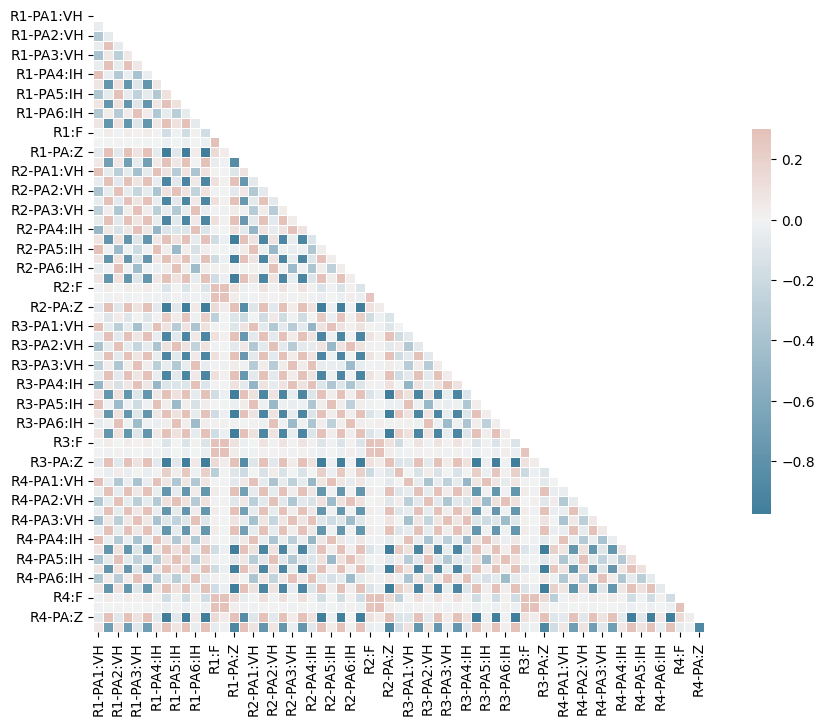

In [14]:


# Your existing correlation matrix calculation
corr = dfn.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the plot as an image (you can specify the path and file format)
#plt.savefig("heatmap_image.png", dpi=300, bbox_inches="tight")
plt.savefig("heatmap_image10.png", dpi=1000, bbox_inches="tight", pad_inches=0)

#Explanation of Parameters:

Dropped columns: ['R4-PA1:VH', 'R4-PA4:IH', 'R2-PM1:V', 'R4-PM1:V', 'R3:F', 'R3-PA2:VH', 'R1-PM5:I', 'R3-PM3:V', 'R4-PM3:V', 'R2-PA2:VH', 'R3-PA:Z', 'R3:DF', 'R1-PA:ZH', 'R2-PM6:I', 'R1-PM4:I', 'R2-PA:Z', 'R4-PM6:I', 'R4-PA:ZH', 'R1:DF', 'R3-PM5:I', 'R1-PM1:V', 'R2-PM3:V', 'R4-PA3:VH', 'R1-PM6:I', 'R4-PM5:I', 'R3-PM1:V', 'R2-PM5:I', 'R1:F', 'R2-PA1:VH', 'R4-PM4:I', 'R4-PM2:V', 'R3-PA5:IH', 'R3-PM6:I', 'R1-PA:Z', 'R1-PA2:VH', 'R1-PA4:IH', 'R4:F', 'R3-PA6:IH', 'R1-PA1:VH', 'R4-PA:Z', 'R3-PM4:I', 'R3-PM2:V', 'R4-PA2:VH', 'R2-PA4:IH', 'R4-PA6:IH', 'R2-PM2:V', 'R3-PA3:VH', 'R1-PM3:V', 'R3-PA:ZH', 'R4-PA5:IH', 'R1-PA6:IH', 'R2:DF', 'R1-PM2:V']


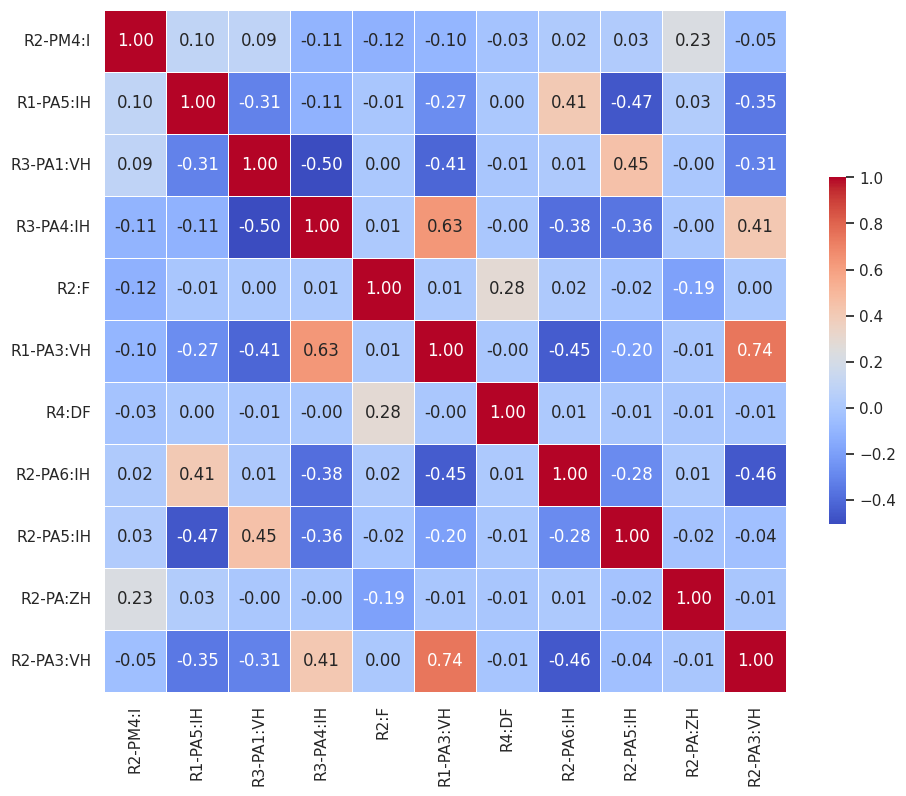

In [15]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix

# Shuffle columns before computing correlation
d = dfn.sample(frac=1, axis=1)  # Shuffle column order
corr_matrix = d.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop highly correlated columns
d_reduced = d.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")

# Plot the reduced correlation matrix
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(d_reduced.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": .5})
plt.show()


In [19]:
dfn.to_csv("remove-angles.csv")

In [18]:
normal_data.shape

(4405, 64)

Maximum Singular Value: 350.3977722696962
Minimum Singular Value: 42.32320510227234
Threshold value for 90% energy: 47.17330494945616


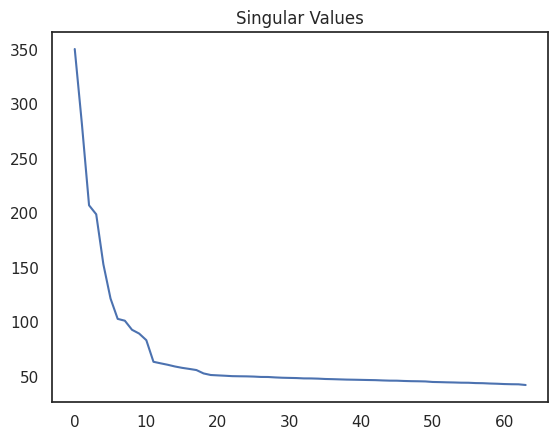

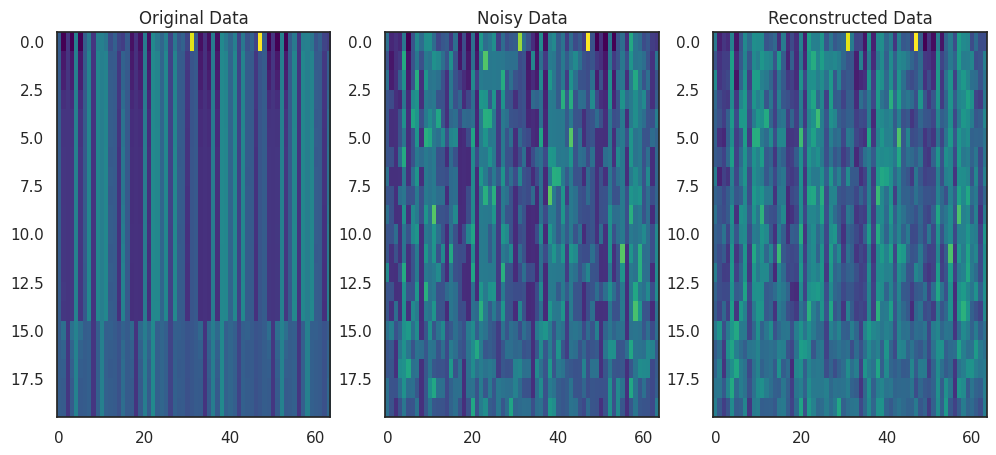

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic data (assuming you have d_reduced)
scaler = StandardScaler()
normal_data = scaler.fit_transform(dfn)
original_data = normal_data.copy()

# Add shot noise (random impulsive noise)
noise_level = 0.5  # Adjust noise intensity
shot_noise = np.random.poisson(lam=noise_level, size=original_data.shape)
noisy_data = original_data + shot_noise

# Compute SVD on the noisy data
U, S, VT = svd(noisy_data, full_matrices=True)

# Compute the maximum and minimum singular values
max_singular_value = np.max(S)
min_singular_value = np.min(S)
print(f"Maximum Singular Value: {max_singular_value}")
print(f"Minimum Singular Value: {min_singular_value}")

# Compute total energy and cumulative energy
total_energy = np.sum(S**2)
cumulative_energy = np.cumsum(S**2)

# Find the threshold that retains 90% of energy
threshold_energy = 0.90 * total_energy
threshold_index = np.argmax(cumulative_energy >= threshold_energy)
threshold = S[threshold_index]
# threshold = 49.822896095735366
print(f"Threshold value for 90% energy: {threshold}")

# Plot singular values
plt.plot(S)
plt.title('Singular Values')
plt.savefig('singular_values.png')
plt.show()

# Threshold singular values
S_thresholded = np.where(S >= threshold, S, 0)

# Create thresholded Σ matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S_thresholded)

# Reconstruct denoised data
reconstructed_data = np.dot(U, np.dot(Sigma_full, VT))

# Compute MSE for noisy vs. denoised data
# mse_noisy_original = mean_squared_error(original_data, noisy_data)
# mse_reconstructed_noisy = mean_squared_error(noisy_data, reconstructed_data)

# print(f"MSE (Noisy vs Original): {mse_noisy_original:.6f}")
# print(f"MSE (Reconstructed vs Noisy): {mse_reconstructed_noisy:.6f}")

# Visualizing original, noisy, and reconstructed data (first few rows)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_data[:20], cmap='viridis', aspect='auto')
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.imshow(noisy_data[:20], cmap='viridis', aspect='auto')
plt.title("Noisy Data")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_data[:20], cmap='viridis', aspect='auto')
plt.title("Reconstructed Data")

plt.show()


In [11]:
original_data.shape

(4405, 14)

In [9]:
U.shape

(4405, 4405)

In [10]:
VT.shape

(14, 14)

In [112]:
d_reduced.to_csv("data-normal.csv")

Maximum Singular Value: 113.63461742687684
Minimum Singular Value: 32.38858431026415
Threshold value for 90% energy: 49.822896095735366


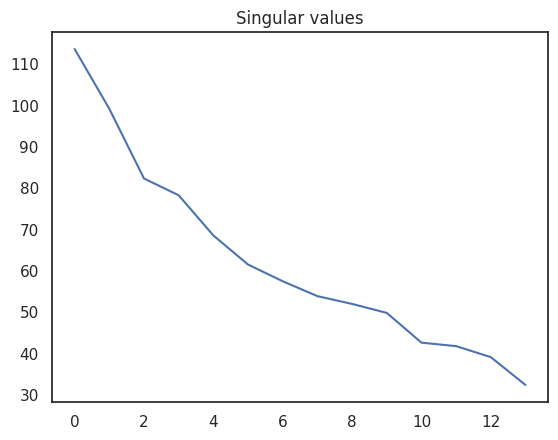

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Assuming normalized_df is your data (already normalized)
normal_data = scaler.fit_transform(d_reduced)
original_data = normal_data

# Compute the SVD with full_matrices=True
U, S, VT = svd(original_data, full_matrices=True)
# Compute the maximum singular value
max_singular_value = np.max(S)
print(f"Maximum Singular Value: {max_singular_value}")

# Compute the minimum singular value
min_singular_value = np.min(S)
print(f"Minimum Singular Value: {min_singular_value}")

# Calculate the total energy (sum of squares of singular values)
total_energy = np.sum(S**2)

# Compute the cumulative energy
cumulative_energy = np.cumsum(S**2)

# Find the threshold such that we retain 90% of the energy
threshold_energy = 0.90 * total_energy
threshold_index = np.argmax(cumulative_energy >= threshold_energy)

# Determine the threshold value (S threshold)
threshold = S[threshold_index]  # the smallest singular value that captures 90% of energy

print(f"Threshold value for 90% energy: {threshold}")

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.savefig('singular_values.png')  # Save the plot as a PNG file
plt.show() 
# Thresholding based on the computed threshold for 90% energy
S_thresholded = np.where(S >= threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))



In [20]:


def svd_threshold(matrix, energy_threshold=0.9):
    # Perform SVD
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    
    # Calculate the squared singular values
    S_squared = S ** 2
    
    # Compute the total energy (sum of squared singular values)
    total_energy = np.sum(S_squared)
    
    # Compute the cumulative energy
    cumulative_energy = np.cumsum(S_squared)
    
    # Find the number of singular values needed to reach the energy threshold
    k = np.argmax(cumulative_energy >= energy_threshold * total_energy) + 1
    
    return k, cumulative_energy[k-1] / total_energy * 100


k, energy_percentage = svd_threshold(normal_data, energy_threshold=0.9)

print(f"Number of singular values to retain for 90% energy: {k}")
print(f"Percentage of energy retained: {energy_percentage}%")

Number of singular values to retain for 90% energy: 8
Percentage of energy retained: 91.45371288898724%


Clean Voltage Symmetrical Components:
V0: 0.00 ∠ 0.00°
V1: 230.00 ∠ -0.00°
V2: 0.00 ∠ 123.69°

Noisy Voltage Symmetrical Components:
V0: 14.61 ∠ 88.81°
V1: 233.24 ∠ 1.78°
V2: 9.39 ∠ 88.79°


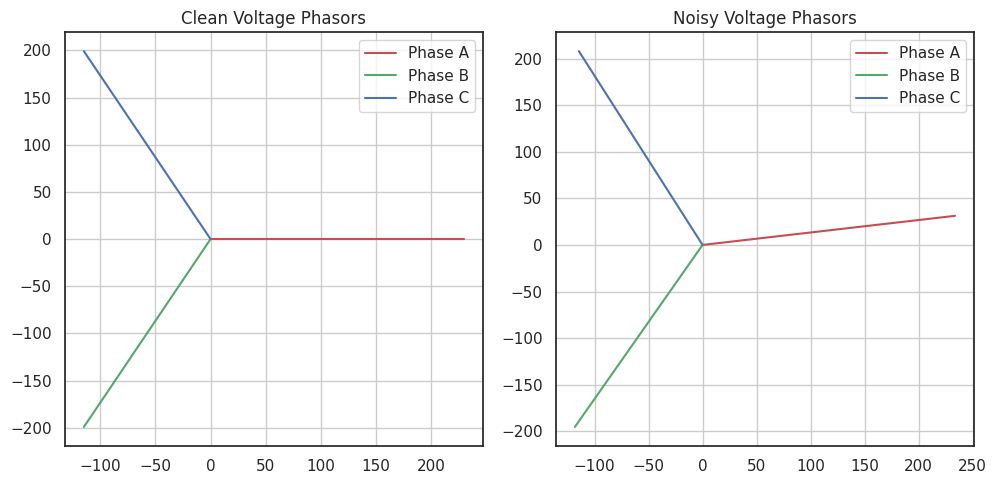

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert polar (magnitude, angle) to complex phasor
def polar_to_complex(magnitude, angle_deg):
    return magnitude * np.exp(1j * np.deg2rad(angle_deg))

# Function to compute symmetrical components
def symmetrical_components(va, vb, vc):
    alpha = np.exp(1j * 2 * np.pi / 3)  # 120° operator
    a2 = alpha**2
    v0 = (va + vb + vc) / 3  # Zero sequence
    v1 = (va + alpha * vb + a2 * vc) / 3  # Positive sequence
    v2 = (va + a2 * vb + alpha * vc) / 3  # Negative sequence
    return v0, v1, v2

# Clean balanced system (example values)
v_mag = 230  # Voltage magnitude (V)
i_mag = 10   # Current magnitude (A)
pa1, pa2, pa3 = 0, -120, 120  # Voltage phase angles (degrees)
pa4, pa5, pa6 = -30, -150, 90  # Current phase angles (degrees, lagging by 30°)

# Convert to complex phasors
va = polar_to_complex(v_mag, pa1)
vb = polar_to_complex(v_mag, pa2)
vc = polar_to_complex(v_mag, pa3)
ia = polar_to_complex(i_mag, pa4)
ib = polar_to_complex(i_mag, pa5)
ic = polar_to_complex(i_mag, pa6)

# Calculate clean symmetrical components
v0, v1, v2 = symmetrical_components(va, vb, vc)
i0, i1, i2 = symmetrical_components(ia, ib, ic)

print("Clean Voltage Symmetrical Components:")
print(f"V0: {abs(v0):.2f} ∠ {np.rad2deg(np.angle(v0)):.2f}°")
print(f"V1: {abs(v1):.2f} ∠ {np.rad2deg(np.angle(v1)):.2f}°")
print(f"V2: {abs(v2):.2f} ∠ {np.rad2deg(np.angle(v2)):.2f}°")

# Add Gaussian noise to magnitudes and angles
noise_level = 0.05  # 5% noise relative to magnitude
np.random.seed(42)  # For reproducibility

# Noisy magnitudes
pm1_noise = v_mag + np.random.normal(0, v_mag * noise_level)  # Phase A
pm2_noise = v_mag + np.random.normal(0, v_mag * noise_level)  # Phase B
pm3_noise = v_mag + np.random.normal(0, v_mag * noise_level)  # Phase C

# Noisy angles (small perturbations)
pa1_noise = pa1 + np.random.normal(0, 5)  # ±5° noise
pa2_noise = pa2 + np.random.normal(0, 5)
pa3_noise = pa3 + np.random.normal(0, 5)

# Convert noisy data to phasors
va_noise = polar_to_complex(pm1_noise, pa1_noise)
vb_noise = polar_to_complex(pm2_noise, pa2_noise)
vc_noise = polar_to_complex(pm3_noise, pa3_noise)

# Calculate noisy symmetrical components
v0_noise, v1_noise, v2_noise = symmetrical_components(va_noise, vb_noise, vc_noise)

print("\nNoisy Voltage Symmetrical Components:")
print(f"V0: {abs(v0_noise):.2f} ∠ {np.rad2deg(np.angle(v0_noise)):.2f}°")
print(f"V1: {abs(v1_noise):.2f} ∠ {np.rad2deg(np.angle(v1_noise)):.2f}°")
print(f"V2: {abs(v2_noise):.2f} ∠ {np.rad2deg(np.angle(v2_noise)):.2f}°")

# Optional: Visualize phasors (clean vs noisy)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Clean Voltage Phasors")
plt.plot([0, va.real], [0, va.imag], 'r', label="Phase A")
plt.plot([0, vb.real], [0, vb.imag], 'g', label="Phase B")
plt.plot([0, vc.real], [0, vc.imag], 'b', label="Phase C")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title("Noisy Voltage Phasors")
plt.plot([0, va_noise.real], [0, va_noise.imag], 'r', label="Phase A")
plt.plot([0, vb_noise.real], [0, vb_noise.imag], 'g', label="Phase B")
plt.plot([0, vc_noise.real], [0, vc_noise.imag], 'b', label="Phase C")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
df

NameError: name 'dfn' is not defined

In [ ]:
dfn['']

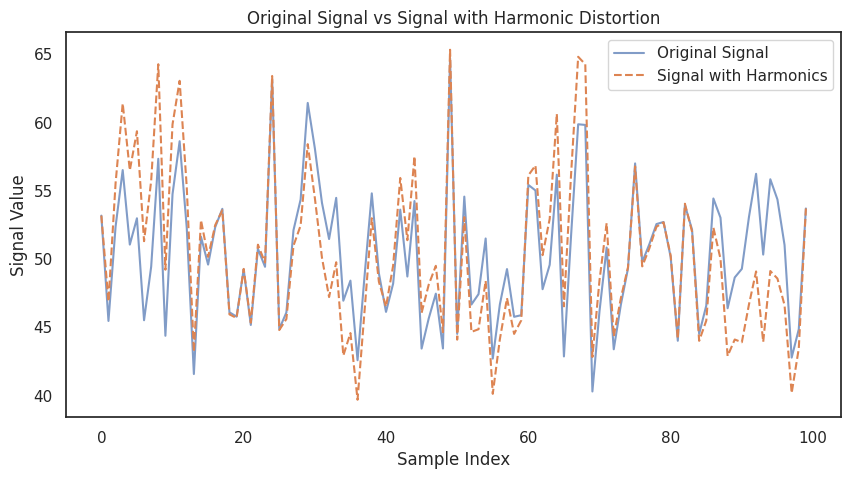

      signal  signal_with_harmonics
0  53.181526              53.181526
1  45.466397              46.893762
2  52.380213              55.564192
3  56.518306              61.398321
4  51.057935              56.498612


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df=dfn

# Function to add harmonic distortion
def add_harmonic_distortion(signal, harmonics=[2, 3, 5], distortion_level=0.05):
    t = np.linspace(0, 1, len(signal))  # Time vector
    noise = np.zeros_like(signal)
    for h in harmonics:
        noise += distortion_level * signal * np.sin(2 * np.pi * h * t)
    return signal + noise

# Apply the function
df['signal_with_harmonics'] = add_harmonic_distortion(df[''])

# Plot the original and distorted signals
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['signal'], label='Original Signal', alpha=0.7)
plt.plot(df.index, df['signal_with_harmonics'], label='Signal with Harmonics', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.title('Original Signal vs Signal with Harmonic Distortion')
plt.legend()
plt.show()

# Display the first few rows
print(df.head())


In [5]:
dfn=dfn.drop(['Unnamed: 0'],axis=1)

In [136]:
# Function to drop correlated features based on a threshold
def drop_correlated_features(df, threshold=0.8,random_state=None):
    #shuffled_df = df.sample(frac=1, axis=1, random_state=random_state)
    corr_matrix = df.corr()
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                        for i in range(corr_matrix.shape[0])
                        for j in range(corr_matrix.shape[1])
                        if upper_triangle[i, j] and abs(corr_matrix.iloc[i, j]) > threshold]

    # Keep track of features to drop
    features_to_drop = set()
    for feature_1, feature_2 in correlated_pairs:

        features_to_drop.add(feature_2)  # Drop the second feature from each pair
        #print(f"parir corr are {feature_1}--{feature_2}")

    return df.drop(columns=list(features_to_drop)), features_to_drop

# Drop correlated features and return the updated DataFrame
cleaned_df, dropped_features = drop_correlated_features(df_sorted, threshold=0.8)

print("Dropped features:", dropped_features)



Dropped features: {'R1-PM6:I', 'R2-PM7:V', 'R3-PM4:I', 'R4-PM3:V', 'R2-PM5:I', 'R4-PM1:V', 'R2-PA3:VH', 'R1-PA7:VH', 'R1-PM2:V', 'R1-PA4:IH', 'R2-PA7:VH', 'R4-PM7:V', 'R4-PM2:V', 'R4-PA5:IH', 'R1-PM11:I', 'R3-PA7:VH', 'R3-PM10:I', 'R2-PA2:VH', 'R4-PM10:I', 'R1-PA5:IH', 'R3-PM7:V', 'R3-PA12:IH', 'R4-PA6:IH', 'R1-PM5:I', 'R3-PM11:I', 'R4-PM11:I', 'R3-PM6:I', 'R3-PA2:VH', 'R1-PM1:V', 'R4-PA3:VH', 'R3-PA8:VH', 'R1-PM3:V', 'R4-PM8:V', 'R2-PM9:V', 'R3-PA1:VH', 'R4-PA10:IH', 'R2-PM6:I', 'R3-PA3:VH', 'R4-PM6:I', 'R3-PA6:IH', 'R3-PA4:IH', 'R3-PM12:I', 'R4-PA2:VH', 'R4-PA:Z', 'R4-PA4:IH', 'R2-PA1:VH', 'R3:DF', 'R4-PM12:I', 'R2-PM11:I', 'R3-PA10:IH', 'R3-PM2:V', 'R2-PA10:IH', 'R4-PA7:VH', 'R2-PM3:V', 'R4-PA12:IH', 'R2-PM1:V', 'R2-PM8:V', 'R4-PM4:I', 'R3-PM8:V', 'R3-PA9:VH', 'R4:F', 'R3-PM1:V', 'R2-PM10:I', 'R2-PM2:V', 'R1-PM4:I', 'R3-PM5:I', 'R3-PM9:V', 'R4-PA1:VH', 'R3-PA11:IH', 'R4-PA11:IH', 'R1-PM10:I', 'R3-PA5:IH', 'R1-PM12:I', 'R1-PA10:IH', 'R1-PA6:IH', 'R1-PM9:V', 'R2-PM4:I', 'R3:F', 'R2-PM

## normalize datset

In [5]:
dfn.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,R1-PA11:IH,R1-PA12:IH,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA4:IH,R2-PA5:IH,R2-PA6:IH,R2-PA8:VH,R2-PA9:VH,R2-PA11:IH,R2-PA12:IH,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,0.0,130556.5169,434.70314,128525.5820,0.0,-19.858717,-139.847539,100.147293,0.0,0.0,35.781214,174.901096,60.007,0.0,9.585332,-0.010833,152.553409,28.968202,-86.860656,0.0,0.0,-152.080992,-17.789612,60.007000,0.0,9.350827,-3.138323,9.301949,-3.132437,0.0,0.0,0.0,-0.017771
1,0.0,131083.0556,432.50582,129077.1940,0.0,-18.821664,-138.787567,101.195806,0.0,0.0,37.276634,173.216601,60.005,0.0,9.475717,-0.006815,153.218082,30.094302,-86.360782,0.0,0.0,-149.850771,-18.256530,60.005001,0.0,9.277685,-3.130211,9.254764,-3.126348,0.0,0.0,0.0,-0.009881
2,0.0,131333.7883,431.40716,129352.9999,0.0,-18.546644,-138.518277,101.476555,0.0,0.0,34.767079,176.413705,60.003,0.0,9.441185,0.000472,153.218082,30.396425,-86.294864,0.0,0.0,-151.778879,-16.762391,60.005001,0.0,9.220933,-3.122057,9.200396,-3.119135,0.0,0.0,0.0,-0.005430
3,0.0,131584.5210,430.85783,129603.7326,0.0,-18.254435,-138.231798,101.768764,0.0,0.0,35.179609,175.806370,60.001,0.0,9.390834,0.004585,153.212591,30.621644,-86.360782,0.0,0.0,-151.213080,-17.646789,60.000999,0.0,9.183769,-3.116546,9.153813,-3.114380,0.0,0.0,0.0,-0.002274
4,0.0,131634.6675,430.67472,129653.8792,0.0,-18.128385,-138.094288,101.883355,0.0,0.0,32.332008,176.677266,60.000,0.0,9.259683,0.013559,153.042300,30.682070,-86.657410,0.0,0.0,-151.921698,-20.475770,60.000000,0.0,9.067368,-3.112000,9.045738,-3.108438,0.0,0.0,0.0,0.009425


In [5]:
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(dfn), columns=dfn.columns)


In [6]:
normalized_df.shape

(20628, 33)

3.6642893066301465×10 
−31

In [13]:
import numpy as np

def svd_threshold(matrix, energy_threshold=0.9):
    # Perform SVD
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    
    # Calculate the squared singular values
    S_squared = S ** 2
    
    # Compute the total energy (sum of squared singular values)
    total_energy = np.sum(S_squared)
    
    # Compute the cumulative energy
    cumulative_energy = np.cumsum(S_squared)
    
    # Find the number of singular values needed to reach the energy threshold
    k = np.argmax(cumulative_energy >= energy_threshold * total_energy) + 1
    
    return k, cumulative_energy[k-1] / total_energy * 100


k, energy_percentage = svd_threshold(normalized_df, energy_threshold=0.9)

print(f"Number of singular values to retain for 90% energy: {k}")
print(f"Percentage of energy retained: {energy_percentage}%")


Number of singular values to retain for 90% energy: 21
Percentage of energy retained: 90.48285430576196%


Maximum Singular Value: 331.45841976931047
Minimum Singular Value: 29.911798458873374
Threshold value for 90% energy: 94.65700055152743


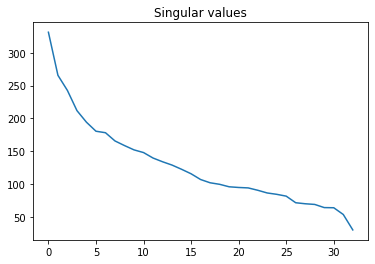

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Assuming normalized_df is your data (already normalized)
original_data = normalized_df.to_numpy()

# Compute the SVD with full_matrices=True
U, S, VT = svd(original_data, full_matrices=True)
# Compute the maximum singular value
max_singular_value = np.max(S)
print(f"Maximum Singular Value: {max_singular_value}")

# Compute the minimum singular value
min_singular_value = np.min(S)
print(f"Minimum Singular Value: {min_singular_value}")

# Calculate the total energy (sum of squares of singular values)
total_energy = np.sum(S**2)

# Compute the cumulative energy
cumulative_energy = np.cumsum(S**2)

# Find the threshold such that we retain 90% of the energy
threshold_energy = 0.90 * total_energy
threshold_index = np.argmax(cumulative_energy >= threshold_energy)

# Determine the threshold value (S threshold)
threshold = S[threshold_index]  # the smallest singular value that captures 90% of energy

print(f"Threshold value for 90% energy: {threshold}")

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.savefig('singular_values.png')  # Save the plot as a PNG file
plt.show() 
# Thresholding based on the computed threshold for 90% energy
S_thresholded = np.where(S >= threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))



In [21]:
29.911798458873374/331.45841976931047

0.09024298878782891

In [17]:
from sklearn.metrics import mean_squared_error
print(f"mse original data :{mean_squared_error(original_data,reconstructed_data)}")

mse original data :0.09517145694238043


## Noise

R1-PM1:V
R1-PM2:V

In [264]:


# Calculate peak signal
peak_signal = normalized_df[selected_feature].max()


peak_noise = np.abs(gaussian_noise).max()

# Calculate PSNR
if peak_noise == 0:
    print("No noise detected")
else:
    psnr = 20 * np.log10(peak_signal / peak_noise)
    print("Peak Signal-to-Noise Ratio (PSNR):", psnr, "dB")


Peak Signal-to-Noise Ratio (PSNR): 9.602178295685135 dB


## selected feature R1-PM8:V

In [8]:
selected_feature='R3-PM3:V'
data_std = np.std(normalized_df[selected_feature])

# Set noise std_dev as a fraction of the data's standard deviation
std_dev = 0.1 * data_std

print(std_dev)

0.1


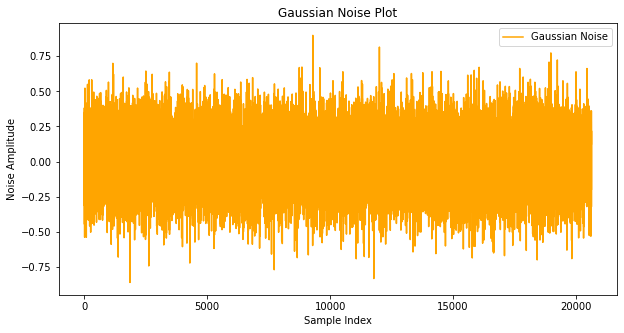

In [51]:
import numpy as np
import matplotlib.pyplot as plt


selected_feature='R4:DF'
mean = 0  # Mean of the Gaussian noise
#std_dev = 2  # Standard deviation (controls the noise intensity)

data_std = np.std(normalized_df[selected_feature])
# Set noise std_dev as a fraction of the data's standard deviation
std_dev = 0.2 * data_std
# Generate Gaussian noise with the same shape as the data
gaussian_noise = np.random.normal(mean, std_dev, normalized_df[selected_feature].shape)
noisy_g=normalized_df.copy()
noisy=add_values_to_column(noisy_g,selected_feature,gaussian_noise)
gaussian_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()
# Plot the noise
plt.figure(figsize=(10, 5))
plt.plot(gaussian_noise, label='Gaussian Noise', color='orange')
plt.title('Gaussian Noise Plot')
plt.xlabel('Sample Index')
plt.ylabel('Noise Amplitude')
plt.legend()
plt.savefig('gussian_noise.png') 
plt.show()


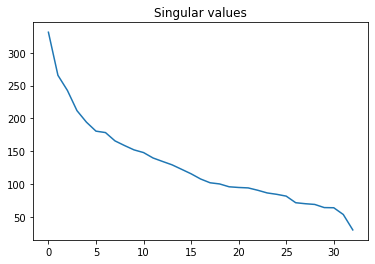

Column with the highest MSE: 20
Maximum MSE value: 0.22840866688078745
Noisiest column: R2-PA9:VH


In [52]:

from scipy.linalg import svd
U, S, VT = svd(gaussian_noise_data, full_matrices=True)
# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.show()

# Thresholding
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
# Compute column-wise MSE
#R4-PM5:I
mse_per_column = np.mean((gaussian_noise_data - reconstructed_data) ** 2, axis=0)

# Find the column with the maximum MSE
max_mse_index = np.argmax(mse_per_column)
max_mse_value = mse_per_column[max_mse_index]

print(f"Column with the highest MSE: {max_mse_index}")
print(f"Maximum MSE value: {max_mse_value}")
print(f"Noisiest column: {noisy.columns[max_mse_index]}")



In [10]:
from sklearn.metrics import mean_squared_error
#print(f"mse noisy gussian noise data :{mean_squared_error(original_data,reconstructed_data)}")


In [7]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,...,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,-0.052631,-0.572541,0.565352,-0.885417,-0.042164,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,...,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.198398
1,-0.052631,-0.277262,0.539150,-0.539862,-0.042164,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,...,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.144120
2,-0.052631,-0.136653,0.526049,-0.367084,-0.042164,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,...,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.113503
3,-0.052631,0.003956,0.519498,-0.210013,-0.042164,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,...,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.091794
4,-0.052631,0.032077,0.517315,-0.178599,-0.042164,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,...,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.011319


In [15]:
mse_values

[0.09562382235932079,
 0.0424019478677698,
 0.11723436800159705,
 0.05274298554391998,
 0.0912495988678816,
 0.13811453504036691,
 0.122699237140963,
 0.031191157770637565,
 0.11515243589683667,
 0.15757565544602248,
 0.093081066658519,
 0.03904909429168998,
 0.031078393116979106,
 0.0014877884910246197,
 0.06941997399900335,
 0.11471061207002627,
 0.07564511592886317,
 0.11761715299777917,
 0.11219015844597907,
 0.1647128571351464,
 0.2283922475914479,
 0.1232199772268494,
 0.0888889037728259,
 0.013811694664573104,
 0.00707984021070202,
 0.16564293618139775,
 0.10841009562547606,
 0.048679990866274225,
 0.1120614832669439,
 0.18285062437950242,
 0.14897567805108694,
 0.013251076764522132,
 0.12446543477938178]

In [13]:
from scipy.linalg import svd
noisy = add_values_to_columns(
    normalized_df, 
    ['R3-PM3:V'], 
    [np.random.normal(0, 0.1, (20628,)) ]
)
gaussian_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()
U, S, VT = svd(gaussian_noise_data, full_matrices=True)
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
mse_values = []


for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(gaussian_noise_data[:, i], reconstructed_data[:, i])
    mse_values.append(column_mse)


min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column ")
print(f"mse noisy gussian noise data :{mean_squared_error(gaussian_noise_data,reconstructed_data)}")
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


Noisiest column:  R2-PA9:VH selected column 
mse noisy gussian noise data :0.09541539213488813
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [59]:
for column in normalized_df.columns :
    selected_feature=column
    mean = 0  # Mean of the Gaussian noise
    # data_std = np.std(normalized_df[selected_feature])
    # std_dev = 0.3 * data_std
    range_fraction = 0.1  # 5% of the data range
    data_range = normalized_df[selected_feature].max() - normalized_df[selected_feature].min()
    std_dev = data_range * range_fraction
    gaussian_noise = np.random.normal(mean, std_dev, normalized_df[selected_feature].shape)
    noisy_g=normalized_df.copy()
    noisy=add_values_to_column(noisy_g,selected_feature,gaussian_noise)
    gaussian_noise_data=noisy.to_numpy()
    original_data=normalized_df.to_numpy()
    U, S, VT = svd(gaussian_noise_data, full_matrices=True)
    Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(Sigma_full, S)
    threshold =94.65700053435214
    S_thresholded = np.where(S > threshold, S, 0)
    Sigma_thresholded = np.zeros_like(Sigma_full)
    np.fill_diagonal(Sigma_thresholded, S_thresholded)
    reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
    mse_values = []

    # Calculate MSE for each column
    for i in range(original_data.shape[1]):
        column_mse = mean_squared_error(gaussian_noise_data[:, i], reconstructed_data[:, i])
        mse_values.append(column_mse)

    # Find the column index with the lowest MSE
    min_mse_column_index = np.argmax(mse_values)
    min_mse_value = mse_values[min_mse_column_index]

    print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column {selected_feature}")
    print(f"mse noisy gussian noise data :{mean_squared_error(original_data,reconstructed_data)}")
    print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Noisiest column:  R2-PA9:VH selected column R1-PM8:V
mse noisy gussian noise data :0.5101479355421883
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R1-PM7:V
mse noisy gussian noise data :0.4226263891262679
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R4-PM5:I
mse noisy gussian noise data :0.14641964904961402
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R3-PM3:V
mse noisy gussian noise data :0.37331473117524383
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R4-PM9:V
mse noisy gussian noise data :0.5269092118887636
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R1-PA1:VH
mse noisy gussian noise data :0.0981743338910013
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisies

KeyboardInterrupt: 

## only work for R2-PA9:VH 0.05 std

In [18]:


def add_values_to_column(df, column_name, values_list):
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist. Creating a new column.")


    # Ensure values_list length matches the DataFrame's length
    if len(values_list) != len(df):
        print("Error: Length of values_list must match the length of the DataFrame.")
        return df

    # Add values to the column
    df[column_name] = df[column_name]+values_list
    
    return df




In [11]:
def add_values_to_columns(df, column_list, noise_list):

    # Add values to the column
    for column, noise in zip(column_list, noise_list):
        df[column] = df[column]+noise
    return df


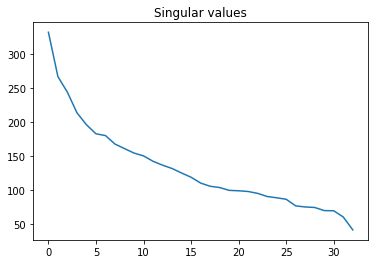

mse noisy gussian noise data :0.09814333156083399


In [195]:

from scipy.linalg import svd


# Parameters
mean = 0  # mean of the Gaussian noise
std_dev = 0.2# standard deviation (controls the noise intensity)
gaussian_noise = np.random.normal(mean, std_dev, original_data.shape)
# Compute the SVD with full_matrices=True
U, S, VT = svd(gaussian_noise+original_data, full_matrices=True)

# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.show()

# Thresholding
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
from sklearn.metrics import mean_squared_error
print(f"mse noisy gussian noise data :{mean_squared_error(original_data,reconstructed_data)}")



In [196]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_values = []

# Calculate MSE for each column
for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(original_data[:, i], reconstructed_data[:, i])
    mse_values.append(column_mse)

# Find the column index with the lowest MSE
min_mse_column_index = np.argmin(mse_values)
min_mse_value = mse_values[min_mse_column_index]

# Print the result
print(f"Column with the lowest MSE: {min_mse_column_index}")
print(f"Lowest MSE value: {min_mse_value}")
print(f"Noisiest column: {normalized_df.columns[min_mse_column_index]}")

Column with the lowest MSE: 13
Lowest MSE value: 0.041116499287215814
Noisiest column: R1:DF


In [205]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_values = []

# Calculate MSE for each column
for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(gaussian_noise_data[:, i], reconstructed_data[:, i])
    mse_values.append(column_mse)

# Find the column index with the lowest MSE
min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

# Print the result
print(f"Column with the biggest MSE: {min_mse_column_index}")
print(f"Lowest MSE value: {min_mse_value}")
print(f"Noisiest column: {noisy.columns[min_mse_column_index]}")

Column with the biggest MSE: 20
Lowest MSE value: 0.22868412933857019
Noisiest column: R2-PA9:VH


In [ ]:
from sklearn.metrics import mean_squared_error
print(f"mse noisy gussian noise data :{mean_squared_error(original_data,reconstructed_data)}")

## shot noise

In [74]:

# Parameters for shot noise simulation
shot_noise_mean =2 # mean of the Poisson distribution
# Generate shot noise (Poisson-distributed)
shot_noise = np.random.poisson(shot_noise_mean, original_data.shape)


In [37]:
noisy_sh = add_values_to_columns(
    normalized_df, 
    [ 'R3-PM3:V'], 
    [np.random.poisson(0.5, (20628,))]
)


In [30]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,...,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,-0.052631,-0.572541,0.565352,4.172783,-0.042164,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,...,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.198398
1,-0.052631,-0.277262,0.539150,5.313450,-0.042164,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,...,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.144120
2,-0.052631,-0.136653,0.526049,4.386779,-0.042164,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,...,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.113503
3,-0.052631,0.003956,0.519498,6.787737,-0.042164,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,...,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.091794
4,-0.052631,0.032077,0.517315,5.782722,-0.042164,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,...,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.011319


In [38]:
# shot_noise_mean =3
# selected_feat='R1-PM7:V'
# shot_noise = np.random.poisson(shot_noise_mean,(20628,))
# noisy=normalized_df.copy()
# noisy=add_values_to_column(noisy,selected_feat,shot_noise)
shot_noise_data=noisy_sh.to_numpy()
original_data=normalized_df.to_numpy()
# plt.figure(figsize=(10, 5))
# plt.plot(shot_noise, label='Shot Noise', color='orange')
# plt.title('Shot Noise Plot')
# plt.xlabel('Sample Index')
# plt.ylabel('Noise Amplitude')
# plt.legend()
# plt.savefig('shot_noise.png') 
# plt.show()

In [39]:

# Compute the SVD with full_matrices=True
U, S, VT = svd(shot_noise_data, full_matrices=True)

# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Thresholding
threshold = 94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstract_data = np.dot(U, np.dot(Sigma_thresholded, VT))



In [41]:
mse_values

[0.1084677832049571,
 0.06505686071916152,
 0.07368784381293607,
 1.2991779750615236e-06,
 0.09134141959880866,
 0.1383124305516948,
 0.11256310381293265,
 0.1613668589005693,
 0.12422528703170992,
 0.15775544442193132,
 0.11459062981687397,
 0.11289274319795319,
 0.03156126478665224,
 0.004522929492272145,
 0.062297696683481,
 0.11494489822419646,
 0.14580891374772004,
 0.1426908503254607,
 0.09946717529860814,
 0.1662541665688846,
 0.22325409434721497,
 0.12014896236753224,
 0.12852830465153917,
 0.008238987417806981,
 0.0075044042270129,
 0.1577986030328083,
 0.11036651888730488,
 0.05266570718707179,
 0.11358519784573955,
 0.20140168322684296,
 0.15102102090489108,
 0.012269120145035912,
 0.10892914376390918]

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_values = []


for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(shot_noise_data[:, i], reconstract_data[:, i])
    mse_values.append(column_mse)


min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column ")
print(f"mse noisy gussian noise data :{mean_squared_error(shot_noise_data,reconstract_data)}")
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


Noisiest column:  R2-PA9:VH selected column 
mse noisy gussian noise data :0.10374307113271179
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [23]:
#total MSE :
print(f"mse after shot noise is {mean_squared_error(shot_noise_data,reconstract_data)}")

mse after shot noise is 0.1037264637664126


## thermal noise

In [43]:

# Constants for thermal noise calculation
k_B = 1.38e-23  # Boltzmann constant in J/K
T = 300  # Temperature in Kelvin
R = 1000  # Resistance in Ohms (adjust as necessary)
delta_f = 1e3  # Bandwidth in Hz (adjust as necessary)

# Calculate the RMS noise voltage
V_noise_rms = np.sqrt(4 * k_B * T * R * delta_f)
print(f"varince {V_noise_rms}")
# thermal_noise = np.random.normal(0, V_noise_rms, (20628,))



varince 1.286856635371633e-07


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.metrics import mean_squared_error
noisy_t = add_values_to_columns(
    normalized_df, 
    ['R3-PM3:V'], 
    [np.random.normal(0, V_noise_rms, (20628,))]
)
them_noise_data=noisy_t.to_numpy()
original_data=normalized_df.to_numpy()
U, S, VT = svd(them_noise_data, full_matrices=True)
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))

print(f"mse noisy gussian noise data :{mean_squared_error(them_noise_data,reconstructed_data)}")

mse noisy gussian noise data :0.10374307113281042


In [22]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,R1-PA11:IH,R1-PA12:IH,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA4:IH,R2-PA5:IH,R2-PA6:IH,R2-PA8:VH,R2-PA9:VH,R2-PA11:IH,R2-PA12:IH,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,-0.052631,-0.572541,0.565352,-0.885417,-0.042164,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,0.555958,2.361378,0.126659,-0.000891,-0.090697,-0.147477,1.358551,0.356122,-0.799407,-0.022757,-0.019584,-2.114345,-0.169909,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.198399
1,-0.052631,-0.277262,0.539150,-0.539862,-0.042164,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,0.577901,2.338044,0.099385,-0.000891,-0.098653,-0.120260,1.365135,0.367570,-0.794856,-0.022757,-0.019584,-2.083974,-0.176527,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.144121
2,-0.052631,-0.136653,0.526049,-0.367084,-0.042164,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,0.541076,2.382332,0.072110,-0.000891,-0.101159,-0.070910,1.365135,0.370642,-0.794256,-0.022757,-0.019584,-2.110231,-0.155349,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.113503
3,-0.052631,0.003956,0.519498,-0.210013,-0.042164,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,0.547130,2.373918,0.044835,-0.000891,-0.104813,-0.043054,1.365080,0.372931,-0.794856,-0.022757,-0.019584,-2.102526,-0.167885,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.091794
4,-0.052631,0.032077,0.517315,-0.178599,-0.042164,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,0.505344,2.385982,0.031197,-0.000891,-0.114331,0.017728,1.363393,0.373546,-0.797556,-0.022757,-0.019584,-2.112176,-0.207983,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.011318


In [46]:
mse_values

[0.10846778320644125,
 0.06505686071841843,
 0.07368784380967412,
 1.2991779652867425e-06,
 0.09134141959914281,
 0.13831243055204723,
 0.1125631038146042,
 0.16136685889781954,
 0.12422528703097098,
 0.15775544442231657,
 0.11459062982050794,
 0.11289274319810556,
 0.03156126478641644,
 0.00452292949197434,
 0.0622976966828283,
 0.11494489822319538,
 0.1458089137450096,
 0.14269085032494538,
 0.09946717530402817,
 0.16625416656849196,
 0.22325409434824892,
 0.12014896237429964,
 0.12852830465565607,
 0.008238987417400506,
 0.007504404226909066,
 0.15779860303275992,
 0.11036651888499256,
 0.05266570718646966,
 0.1135851978448169,
 0.2014016832253688,
 0.15102102090454564,
 0.012269120145024091,
 0.10892914376134943]

In [45]:
mse_values = []


for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(them_noise_data[:, i], reconstructed_data[:, i])
    mse_values.append(column_mse)


min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column ")
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Noisiest column:  R2-PA9:VH selected column 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


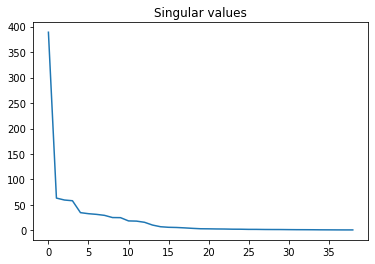

mse noisy themprual noise  data :0.01701035707531065


In [91]:

# Compute the SVD with full_matrices=True
U, S, VT = svd(thermal_noise+original_data, full_matrices=True)

# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.show()

# Thresholding
threshold = 63.48445794271357
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstract_data = np.dot(U, np.dot(Sigma_thresholded, VT))
from sklearn.metrics import mean_squared_error
print(f"mse noisy themprual noise  data :{mean_squared_error(original_data,reconstract_data)}")

##  impulse noise

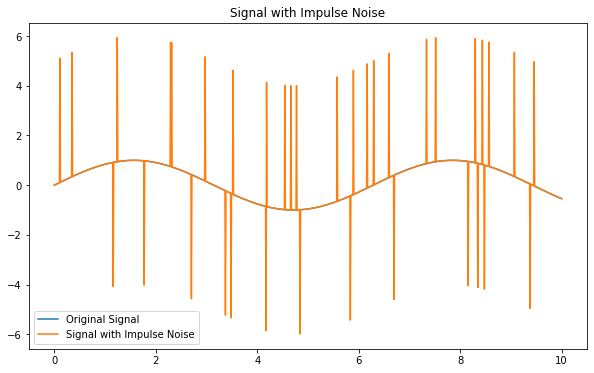

In [30]:
# Parameters for impulse noise
impulse_amplitude = 5  # amplitude of the spikes
impulse_probability = 0.05  # probability of impulse occurrence
impulse_noise = np.zeros_like(signal)

# Randomly add impulses
for i in range(signal_length):
    if np.random.rand() < impulse_probability:
        impulse_noise[i] = np.random.choice([-impulse_amplitude, impulse_amplitude])

# Simulated signal with impulse noise
signal_with_impulse_noise = signal + impulse_noise

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal')
plt.plot(time, signal_with_impulse_noise, label='Signal with Impulse Noise')
plt.legend()
plt.title('Signal with Impulse Noise')
plt.show()


In [35]:
# shot_noise_mean =3
# selected_feat='R1-PM7:V'
# shot_noise = np.random.poisson(shot_noise_mean,(20628,))
# noisy=normalized_df.copy()
# noisy=add_values_to_column(noisy,selected_feat,shot_noise)
shot_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()
# plt.figure(figsize=(10, 5))
# plt.plot(shot_noise, label='Shot Noise', color='orange')
# plt.title('Shot Noise Plot')
# plt.xlabel('Sample Index')
# plt.ylabel('Noise Amplitude')
# plt.legend()
# plt.savefig('shot_noise.png') 
# plt.show()

(20628, 39)

## for impulse noise :
impulse_amplitude = 2 
impulse_probability = 0.02 

In [342]:
import numpy as np
original_data=normalized_df.to_numpy()
# Define signal shape and impulse noise parameters
signal_shape = original_data.shape
impulse_amplitude = 2  # amplitude of the spikes
impulse_probability = 0.02  # probability of impulse occurrence

# Generate a random signal for demonstration purposes


# Create an array for impulse noise
impulse_noise = np.zeros((signal_shape))

# Randomly add impulses
for i in range(signal_shape[0]):
    for j in range(signal_shape[1]):
        if np.random.rand() < impulse_probability:
            impulse_noise[i, j] = np.random.choice([-impulse_amplitude, impulse_amplitude])




print("Impulse Noise Sample:\n", impulse_noise[:5, :5])



Impulse Noise Sample:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [344]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,R1-PA11:IH,R1-PA12:IH,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA4:IH,R2-PA5:IH,R2-PA6:IH,R2-PA8:VH,R2-PA9:VH,R2-PA11:IH,R2-PA12:IH,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,-0.052631,1.427459,0.565352,-0.885417,-0.042164,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,0.555958,2.361378,0.126659,-0.000891,-0.090697,-0.147477,1.358551,0.356122,-0.799407,-0.022757,-0.019584,-2.114345,-0.169909,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.198398
1,-0.052631,-0.277262,0.539150,2.460138,0.957836,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,0.577901,2.338044,0.099385,-0.000891,-0.098653,-0.120260,1.365135,0.367570,-0.794856,-0.022757,-0.019584,-2.083974,-0.176527,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.144120
2,-0.052631,-0.136653,0.526049,3.632916,0.957836,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,0.541076,2.382332,0.072110,-0.000891,-0.101159,-0.070910,1.365135,0.370642,-0.794256,-0.022757,-0.019584,-2.110231,-0.155349,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.113503
3,-0.052631,4.003956,0.519498,0.789987,0.957836,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,0.547130,2.373918,0.044835,-0.000891,-0.104813,-0.043054,1.365080,0.372931,-0.794856,-0.022757,-0.019584,-2.102526,-0.167885,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.091794
4,-0.052631,0.032077,0.517315,0.821401,2.957836,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,0.505344,2.385982,0.031197,-0.000891,-0.114331,0.017728,1.363393,0.373546,-0.797556,-0.022757,-0.019584,-2.112176,-0.207983,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.011319


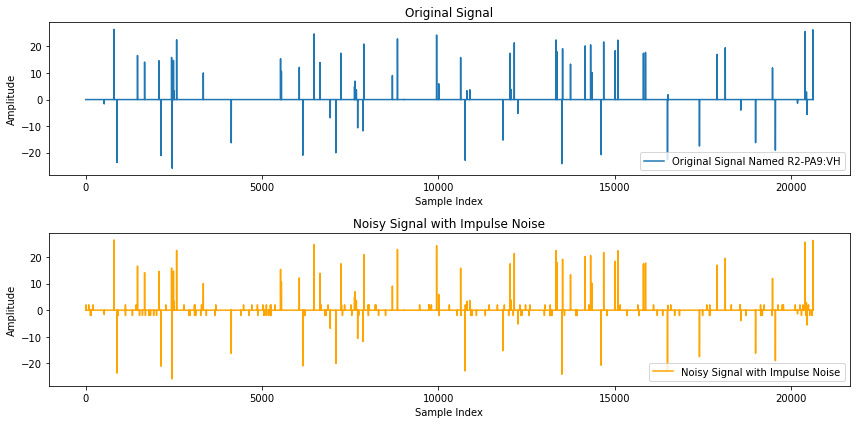

In [378]:
import numpy as np
import matplotlib.pyplot as plt


original_data=normalized_df['R3-PM3:V']
# Define impulse noise parameters
impulse_amplitude = 2  # Amplitude of the spikes
impulse_probability = 0.007  # Probability of impulse occurrence

# Create an array for impulse noise
impulse_noise = np.zeros(original_data.shape)  # Same shape as the signal

# Randomly add impulses
for i in range(original_data.shape[0]):
    if np.random.rand() < impulse_probability:
        impulse_noise[i] = np.random.choice([-impulse_amplitude, impulse_amplitude])

# Add impulse noise to the original signal
noisy_signal = original_data + impulse_noise

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(original_data, label='Original Signal Named R2-PA9:VH')
plt.title('Original Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(noisy_signal, label='Noisy Signal with Impulse Noise', color='orange')
plt.title('Noisy Signal with Impulse Noise')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()

plt.savefig("impulse.png")
plt.show()


In [49]:


noisy = add_values_to_columns(
    normalized_df.copy(), 
    [ 'R3-PM3:V' ], 
    [impulse_noise_gen(noisy_c['R3-PM3:V'],2,0.007)]
)


In [47]:
def impulse_noise_gen(data,impulse_amplitude,impulse_probability):
    impulse_noise = np.zeros(data.shape)  

    for i in range(data.shape[0]):
        if np.random.rand() < impulse_probability:
            impulse_noise[i] = np.random.choice([-impulse_amplitude, impulse_amplitude])

    return impulse_noise

    

In [371]:

selected_feat='R2-PA9:VH'
original_data=normalized_df[selected_feat]
impulse_amplitude = 2  # Amplitude of the spikes
impulse_probability = 0.007  # Probability of impulse occurrence

# Create an array for impulse noise
impulse_noise = np.zeros(original_data.shape)  # Same shape as the signal

# Randomly add impulses
for i in range(original_data.shape[0]):
    if np.random.rand() < impulse_probability:
        impulse_noise[i] = np.random.choice([-impulse_amplitude, impulse_amplitude])

noisy_c=normalized_df.copy()
noisy=add_values_to_column(noisy_c,selected_feat,impulse_noise)
impulse_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()
# plt.figure(figsize=(10, 5))
# plt.plot(shot_noise, label='Shot Noise', color='orange')
# plt.title('Shot Noise Plot')
# plt.xlabel('Sample Index')
# plt.ylabel('Noise Amplitude')
# plt.legend()
# plt.savefig('shot_noise.png') 
# plt.show()

In [51]:
impulse_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()

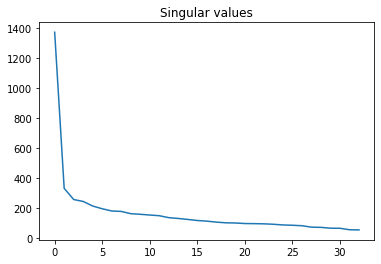

In [53]:

# Compute the SVD with full_matrices=True
U, S, VT = svd(impulse_noise_data, full_matrices=True)

# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.show()

# Thresholding
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstract_data = np.dot(U, np.dot(Sigma_thresholded, VT))
from sklearn.metrics import mean_squared_error
#print(f"mse noisy impulse noise noise data :{mean_squared_error(impulse_noise+original_data,reconstract_data)}")

In [54]:
print(f"mse noisy impulse noise noise data :{mean_squared_error(impulse_noise_data,reconstract_data)}")

mse noisy impulse noise noise data :0.10374316606013075


In [403]:
normalized_df['R1-PM8:V'].shape

(20628,)

In [59]:
mse_values


[0.10847046213822822,
 0.06505792620507164,
 0.07369094576051337,
 1.2905531881941188e-06,
 0.09134442138580251,
 0.13830754062306358,
 0.11255391678043287,
 0.16135826873828957,
 0.12423128350824146,
 0.15775611305062906,
 0.11459752400354144,
 0.11289534426021523,
 0.03156088708904543,
 0.004523070926266693,
 0.06229908659205318,
 0.11494314322336444,
 0.14579344472825306,
 0.14268502547950446,
 0.09946884551727261,
 0.16625595435082963,
 0.2232498252254081,
 0.12015561181673995,
 0.128536657105,
 0.008240959399448475,
 0.007504582562147629,
 0.15779943884009454,
 0.11036323327632193,
 0.052668784667873565,
 0.11358381823626049,
 0.20140804956043223,
 0.15102058353994816,
 0.012268707622522771,
 0.10892973321830253]

In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_values = []

# Calculate MSE for each column
for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(impulse_noise_data[:, i], reconstract_data[:, i])
    mse_values.append(column_mse)

# Find the column index with the lowest MSE
min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

# Print the result
print(f"Column with the biggest MSE: {min_mse_column_index}")
print(f"bigest MSE value: {min_mse_value}")
print(f"Noisiest column: {noisy.columns[min_mse_column_index]}")

Column with the biggest MSE: 20
bigest MSE value: 0.2232498252254081
Noisiest column: R2-PA9:VH


In [40]:
from sklearn.metrics import mean_squared_error
print(f"mse noisy impulse noise noise data :{mean_squared_error(impulse_noise+original_data,reconstructed_data)}")

mse noisy impulse noise noise data :1.2587441105343078


In [78]:
import numpy as np

# Define signal shape
signal_shape = original_data.shape

# Generate the original signal (randomly for demonstration)
signal = np.random.rand(*signal_shape)

# Generate flicker noise for each column
flicker_noise = np.zeros(signal_shape)
for col in range(signal_shape[1]):
    noise = np.random.randn(signal_shape[0])  # Random noise
    flicker_noise[:, col] = np.cumsum(noise)  # Cumulative sum to simulate flicker noise

# Scale the flicker noise
scaling_factor = 0.01
flicker_noise *= scaling_factor



print("Flicker Noise Sample:\n", flicker_noise[:5, :5])



Flicker Noise Sample:
 [[ 0.00239232  0.00661289  0.00371178  0.00205412 -0.01693251]
 [ 0.00769023 -0.00527296 -0.01114353  0.00422655 -0.01352808]
 [ 0.00508491 -0.02652242 -0.02111988 -0.00072707 -0.01248276]
 [ 0.00977486 -0.02519787 -0.0274341   0.00986823 -0.02247303]
 [ 0.00255225 -0.03687515 -0.03132817  0.01625315 -0.034653  ]]


In [398]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,R1-PA11:IH,R1-PA12:IH,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA4:IH,R2-PA5:IH,R2-PA6:IH,R2-PA8:VH,R2-PA9:VH,R2-PA11:IH,R2-PA12:IH,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,-0.052631,1.427459,0.565352,-0.885417,-0.042164,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,0.555958,2.361378,0.126659,-0.000891,-0.090697,-0.147477,1.358551,0.356122,-0.799407,-0.022757,-0.019584,-2.114345,-0.169909,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.198398
1,-0.052631,-0.277262,0.539150,2.460138,0.957836,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,0.577901,2.338044,0.099385,-0.000891,-0.098653,-0.120260,1.365135,0.367570,-0.794856,-0.022757,-0.019584,-2.083974,-0.176527,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.144120
2,-0.052631,-0.136653,0.526049,3.632916,0.957836,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,0.541076,2.382332,0.072110,-0.000891,-0.101159,-0.070910,1.365135,0.370642,-0.794256,-0.022757,-0.019584,-2.110231,-0.155349,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.113503
3,-0.052631,4.003956,0.519498,0.789987,0.957836,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,0.547130,2.373918,0.044835,-0.000891,-0.104813,-0.043054,1.365080,0.372931,-0.794856,-0.022757,-0.019584,-2.102526,-0.167885,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.091794
4,-0.052631,0.032077,0.517315,0.821401,2.957836,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,0.505344,2.385982,0.031197,-0.000891,-0.114331,0.017728,1.363393,0.373546,-0.797556,-0.022757,-0.019584,-2.112176,-0.207983,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.011319


In [405]:
print(normalized_df['R1-PM8:V'].shape[0])

20628


In [60]:
import numpy as np

# Generate flicker noise function
def generate_flicker_noise(size, alpha=1):
    white_noise = np.random.normal(size=size)
    f_noise = np.fft.rfft(white_noise)
    frequencies = np.fft.rfftfreq(size)
    frequencies[0] = 1  # Avoid division by zero at DC component
    f_noise /= np.sqrt(frequencies ** alpha)
    return np.fft.irfft(f_noise, n=size)


# Generate and add flicker noise for each column
# flicker_noise = np.zeros_like(data)
# for i in range(data.shape[1]):
#     flicker_noise[:, i] = generate_flicker_noise(data.shape[0])
# fliker_noise=generate_flicker_noise(normalized_df['R2-PA9:VH'].shape[0])
# # Scale the noise (optional, adjust factor based on dataset range)
# noise_scale_factor = 0.01  # Adjust to control noise intensity
# fliker_noise= noise_scale_factor * fliker_noise

# plt.figure(figsize=(10, 5))
# plt.plot(fliker_noise, label='Fliker Noise', color='orange')
# plt.title('Fliker Noise Plot')
# plt.xlabel('Sample Index')
# plt.ylabel('Noise Amplitude')
# plt.legend()
# plt.savefig('fliker_noise.png') 



## detect R2-PA9:VH

In [422]:

selected_feat='R2-PA9:VH'
fliker_noise=generate_flicker_noise(normalized_df[selected_feat].shape[0])
# Scale the noise (optional, adjust factor based on dataset range)
noise_scale_factor = 0.01  # Adjust to control noise intensity
fliker_noise= noise_scale_factor * fliker_noise

noisy_d=normalized_df.copy()
noisy=add_values_to_column(noisy_d,selected_feat,fliker_noise)
fliker_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()


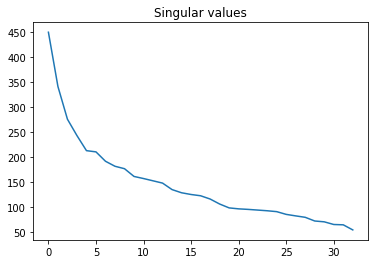

In [423]:

# Compute the SVD with full_matrices=True
U, S, VT = svd(fliker_noise_data, full_matrices=True)

# Create the full \(\Sigma\) matrix
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)

# Plot singular values
plt.plot(S)
plt.title('Singular values')
plt.show()

# Thresholding
threshold = 94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)

# Create the thresholded \(\Sigma\) matrix
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)

# Reconstruct the denoised matrix
reconstract_data = np.dot(U, np.dot(Sigma_thresholded, VT))
from sklearn.metrics import mean_squared_error
#print(f"mse noisy flicker noise noise data :{mean_squared_error(original_data,reconstract_data)}")

In [424]:
import numpy as np
from sklearn.metrics import mean_squared_error


mse_values = []

# Calculate MSE for each column
for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(fliker_noise_data[:, i], reconstract_data[:, i])
    mse_values.append(column_mse)

# Find the column index with the lowest MSE
min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

# Print the result
print(f"Column with the biggest MSE: {min_mse_column_index}")
print(f"Lowest MSE value: {min_mse_value}")
print(f"Noisiest column: {noisy.columns[min_mse_column_index]}")

Column with the biggest MSE: 20
Lowest MSE value: 0.23944497277707733
Noisiest column: R2-PA9:VH


In [75]:
normalized_df=normalized_df.drop(['R2-PA9:VH'],axis=1)

In [76]:
normalized_df.head()

,R1-PM8:V,R1-PM7:V,R4-PM5:I,R3-PM3:V,R4-PM9:V,R1-PA1:VH,R1-PA2:VH,R1-PA3:VH,R1-PA8:VH,R1-PA9:VH,R1-PA11:IH,R1-PA12:IH,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R2-PA4:IH,R2-PA5:IH,R2-PA6:IH,R2-PA8:VH,R2-PA11:IH,R2-PA12:IH,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R3-PA:Z,R3-PA:ZH,R4-PA8:VH,R4-PA9:VH,R4:DF,R4-PA:ZH
0,0.134505,-0.567690,0.565352,1.985022,0.168485,-0.033917,-1.301597,0.986273,-0.017433,-0.014158,0.555958,2.361378,0.126659,-0.000891,-0.090697,-0.147477,1.358551,0.356122,-0.799407,-0.022757,-2.114345,-0.169909,0.052473,0.007376,-0.215259,-0.418237,-0.208393,-0.397095,-0.021206,-0.018531,0.006805,-0.199471
1,0.376486,-0.402782,0.539150,-1.025885,0.140965,-0.023844,-1.291899,0.996915,-0.017433,-0.014158,0.577901,2.338044,0.099385,-0.000891,-0.098653,-0.120260,1.365135,0.367570,-0.794856,-0.022757,-2.083974,-0.176527,0.036393,0.007376,-0.230794,-0.414201,-0.217225,-0.393936,-0.021206,-0.018531,0.006805,-0.125505
2,0.328981,0.075008,0.526049,2.062588,0.445529,-0.021172,-1.289435,0.999764,-0.017433,-0.014158,0.541076,2.382332,0.072110,-0.000891,-0.101159,-0.070910,1.365135,0.370642,-0.794256,-0.022757,-2.110231,-0.155349,0.036393,0.007376,-0.242847,-0.410144,-0.227401,-0.390195,-0.021206,-0.018531,0.006805,-0.117203
3,-0.135539,0.142744,0.519498,1.852627,-0.334936,-0.018334,-1.286814,1.002730,-0.017433,-0.014158,0.547130,2.373918,0.044835,-0.000891,-0.104813,-0.043054,1.365080,0.372931,-0.794856,-0.022757,-2.102526,-0.167885,0.004202,0.007376,-0.250741,-0.407402,-0.236120,-0.387728,-0.021206,-0.018531,0.006805,-0.096786
4,-0.443098,0.106986,0.517315,-0.169391,-0.256823,-0.017110,-1.285556,1.003893,-0.017433,-0.014158,0.505344,2.385982,0.031197,-0.000891,-0.114331,0.017728,1.363393,0.373546,-0.797556,-0.022757,-2.112176,-0.207983,-0.003838,0.007376,-0.275463,-0.405140,-0.256348,-0.384647,-0.021206,-0.018531,0.006805,-0.022617


In [85]:
for column in normalized_df.columns :
    selected_feature=column
    fliker_noise=generate_flicker_noise(normalized_df[selected_feature].shape[0])

    noise_scale_factor = 0.01  # Adjust to control noise intensity
    fliker_noise= noise_scale_factor * fliker_noise

    noisy_d=normalized_df.copy()
    noisy=add_values_to_column(noisy_d,selected_feature,fliker_noise)
    fliker_noise_data=noisy.to_numpy()

    original_data=normalized_df.to_numpy()
    U, S, VT = svd(fliker_noise_data, full_matrices=True)
    Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
    np.fill_diagonal(Sigma_full, S)
    threshold =94.65700053435214
    S_thresholded = np.where(S > threshold, S, 0)
    Sigma_thresholded = np.zeros_like(Sigma_full)
    np.fill_diagonal(Sigma_thresholded, S_thresholded)
    reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
    mse_values = []

    # Calculate MSE for each column
    for i in range(original_data.shape[1]):
        column_mse = mean_squared_error(fliker_noise_data[:, i], reconstructed_data[:, i])
        mse_values.append(column_mse)

    # Find the column index with the lowest MSE
    min_mse_column_index = np.argmax(mse_values)
    min_mse_value = mse_values[min_mse_column_index]

    print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column {selected_feature}")
    print(f"mse noisy gussian noise data :{mean_squared_error(original_data,reconstructed_data)}")
    print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Noisiest column:  R2-PA9:VH selected column R1-PM8:V
mse noisy gussian noise data :0.10836509504124608
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R1-PM7:V
mse noisy gussian noise data :0.10836661239337929
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R4-PM5:I
mse noisy gussian noise data :0.09520546306591529
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R3-PM3:V
mse noisy gussian noise data :0.09520639766936481
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R4-PM9:V
mse noisy gussian noise data :0.09521367751566658
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noisiest column:  R2-PA9:VH selected column R1-PA1:VH
mse noisy gussian noise data :0.10835933357589829
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Noi

In [67]:
mse_values

[0.10854886269818266,
 0.06504638554299925,
 0.07356892063075313,
 8.24226520812944e-07,
 0.0914089947241855,
 0.13831891741308902,
 0.11260992285915086,
 0.161351617817269,
 0.12419314664808254,
 0.15776660245186738,
 0.11471326616665768,
 0.11291975113362315,
 0.031542757388593926,
 0.004507713876472672,
 0.06225400546917427,
 0.11489509079996546,
 0.14566225041159947,
 0.14269879540830024,
 0.0996148984413855,
 0.16624353912050932,
 0.22329422863949003,
 0.12042623971641636,
 0.12864729572810307,
 0.008213455007405338,
 0.007498802491398536,
 0.15774179498277688,
 0.11031310332083033,
 0.052578458254083034,
 0.11353600448586701,
 0.20130721380001354,
 0.1509998819513607,
 0.012276852772233109,
 0.10891187092144762]

In [65]:
noisy = add_values_to_columns(
    normalized_df, 
    ['R3-PM3:V'], 
    [0.087*generate_flicker_noise(20628)]
)
fliker_noise_data=noisy.to_numpy()
original_data=normalized_df.to_numpy()
U, S, VT = svd(fliker_noise_data, full_matrices=True)
Sigma_full = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_full, S)
threshold =94.65700053435214
S_thresholded = np.where(S > threshold, S, 0)
Sigma_thresholded = np.zeros_like(Sigma_full)
np.fill_diagonal(Sigma_thresholded, S_thresholded)
reconstructed_data = np.dot(U, np.dot(Sigma_thresholded, VT))
mse_values = []


for i in range(original_data.shape[1]):
    column_mse = mean_squared_error(fliker_noise_data[:, i], reconstructed_data[:, i])
    mse_values.append(column_mse)


min_mse_column_index = np.argmax(mse_values)
min_mse_value = mse_values[min_mse_column_index]

print(f"Noisiest column:  {noisy.columns[min_mse_column_index]} selected column ")
print(f"mse noisy gussian noise data :{mean_squared_error(fliker_noise_data,reconstructed_data)}")
print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


Noisiest column:  R2-PA9:VH selected column 
mse noisy gussian noise data :0.1037458019787819
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
